In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction

The [Spanish Virtual Observatory (SVO) Filter Profile Service](http://svo2.cab.inta-csic.es/theory/fps3/) is a great resource for homogenized photometric filter curves and metadata. With `svo_filters`, I tried to create a lightweight and flexible package to incorporate these filters into Python applications.

Install in the usual fashion with

```
cd svo_filters
python setup.py install
```

Then import like so

In [5]:
from svo_filters import svo

The actual filters are stored locally as XML files and can be viewed with

In [13]:
svo.filter_list()

{'bands': ['2MASS.H',
  '2MASS.J',
  '2MASS.Ks',
  'IRAC.I1',
  'IRAC.I2',
  'IRAC.I3',
  'IRAC.I4',
  'Kepler.K',
  'WFC3_IR.G102',
  'WFC3_IR.G141',
  'WFC3_UVIS2.F814W',
  'WFC3_UVIS2.F850LP',
  'WISE.W1',
  'WISE.W2',
  'WISE.W3',
  'WISE.W4'],
 'files': ['/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/2MASS.H',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/2MASS.J',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/2MASS.Ks',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/IRAC.I1',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/IRAC.I2',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/IRAC.I3',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/IRAC.I4',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/Kepler.K',
  '/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/filters/WFC3_IR.G102

# Load a Photometric Filter

To load a filter object, just pass the band name to the `Filter` class. We can then view the metadata and see a plot!

     Attributes                                              Values                                        
-------------------- --------------------------------------------------------------------------------------
                Band H                                                                                     
CalibrationReference http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C&db_key=AST
                FWHM 0.260964753837 um                                                                     
            Facility 2MASS                                                                                 
FilterProfileService ivo://svo/fps                                                                         
              MagSys Vega                                                                                  
           PhotCalID 2MASS/2MASS.H/Vega                                                                    
          PhotSystem 2MASS  

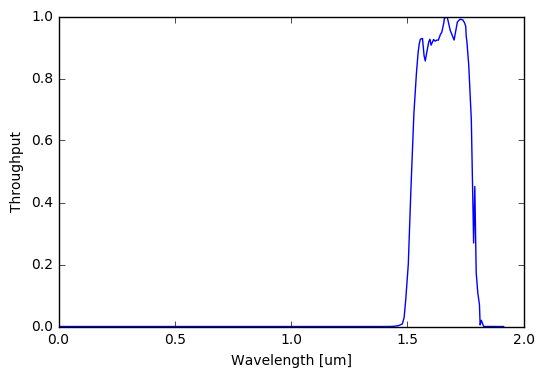

In [15]:
H_band = svo.Filter('2MASS.H')
H_band.info()
H_band.plot()

The actual relative spectral response curve is stored as an array of the wavelength and throughput.

In [18]:
H_band.rsr.shape

(2, 58)

# Load a Grism

Filters can also be binned arbitrarily, for use with grisms. We can pass integers to the `n_bins` or `n_channels` arguments to specify the number of wavelength bins or channels per bin, respectively.

15 bins of 634 channels each.
     Attributes                                                                                                                                                                                                                                                                           Values                                                                                                                                                                                                                                                                     
-------------------- ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

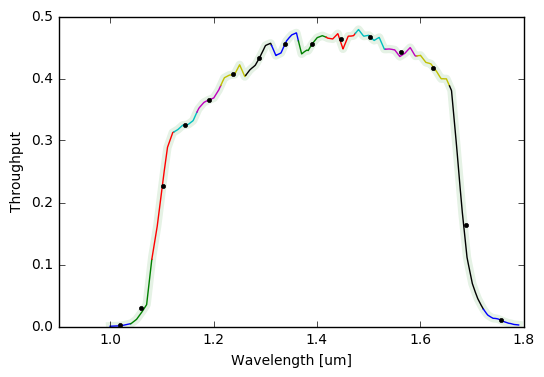

In [35]:
G141 = svo.Filter('WFC3_IR.G141', n_bins=15)
G141.info()
G141.plot()

This can get even fancier by passing an arbitrary array of length `n_channels` to the `bin_throughput` argument in order to change the shape of the bin throughput.

15 bins of 634 channels each.
15 bins of 634 channels each.


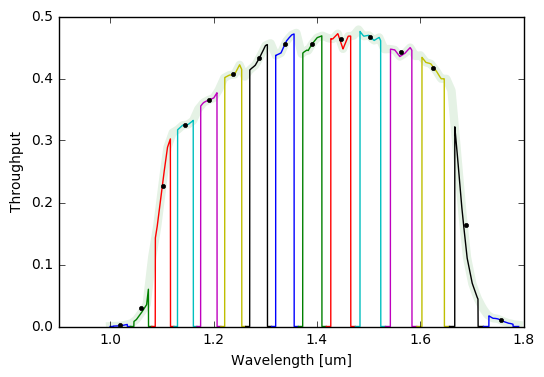

In [45]:
import numpy as np
G141 = svo.Filter('WFC3_IR.G141', n_bins=15)

# Let's just do a top-hat
throughput = np.ones(G141.n_channels)
throughput[:100] = 0
throughput[-100:] = 0
G141.bin(bin_throughput=throughput)
G141.plot()

Filters are fun!